# Merged dataset

In [ ]:
import pandas as pd

# Load the movies data
movies_df = pd.read_csv('C:/Users/jiawe/Desktop/movies.csv')

# Load the ratings data
ratings_df = pd.read_csv('C:/Users/jiawe/Desktop/ratings.csv')

# Inspect the DataFrames
print(movies_df.head())
print(ratings_df.head())

# Join the DataFrames on 'movieId'
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Save to a new CSV file
merged_df.to_csv('C:/Users/jiawe/Desktop/merged_movies_ratings.csv', index=False)

# Inspect the resulting DataFrame
print(merged_df.head())


# Explore data

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/jiawe/Desktop/merged_movies_ratings.csv')  # Change the path and file type if needed

# Count the number of rows
row_count = len(df)

print(f'The number of rows in the dataset is: {row_count}')

The number of rows in the dataset is: 25000095


In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/jiawe/Desktop/merged_movies_ratings.csv')  # Adjust the path as needed

# Check for any missing values in the dataset
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "C:/Users/jiawe/Desktop/merged_movies_ratings.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows to check the columns
print(data.head())

   userId  movieId  rating   timestamp  \
0       1      296     5.0  1147880044   
1       1      306     3.5  1147868817   
2       1      307     5.0  1147868828   
3       1      665     5.0  1147878820   
4       1      899     3.5  1147868510   

                                              title  \
0                               Pulp Fiction (1994)   
1  Three Colors: Red (Trois couleurs: Rouge) (1994)   
2  Three Colors: Blue (Trois couleurs: Bleu) (1993)   
3                                Underground (1995)   
4                        Singin' in the Rain (1952)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1                        Drama  
2                        Drama  
3             Comedy|Drama|War  
4       Comedy|Musical|Romance  


# non-mapreduce approach using python


In [4]:
# Filtering movies with at least 400 ratings
rating_counts = data['movieId'].value_counts()
filtered_movie_ids = rating_counts[rating_counts >= 400].index
filtered_data = data[data['movieId'].isin(filtered_movie_ids)]

In [5]:
# Calculating average rating and number of ratings for each movie
average_ratings_all = data.groupby('title').agg({'rating': 'mean', 'movieId': 'size'}).reset_index()
average_ratings_all.columns = ['title', 'average_rating', 'rating_count']

average_ratings_filtered = filtered_data.groupby('title').agg({'rating': 'mean', 'movieId': 'size'}).reset_index()
average_ratings_filtered.columns = ['title', 'average_rating', 'rating_count']

In [6]:
# Getting the top 20 movies by average rating without filtering for minimum ratings
top_20_all = average_ratings_all.nlargest(20, 'average_rating')

# Getting the top 20 movies by average rating with at least 400 ratings
top_20_filtered = average_ratings_filtered.nlargest(20, 'average_rating')

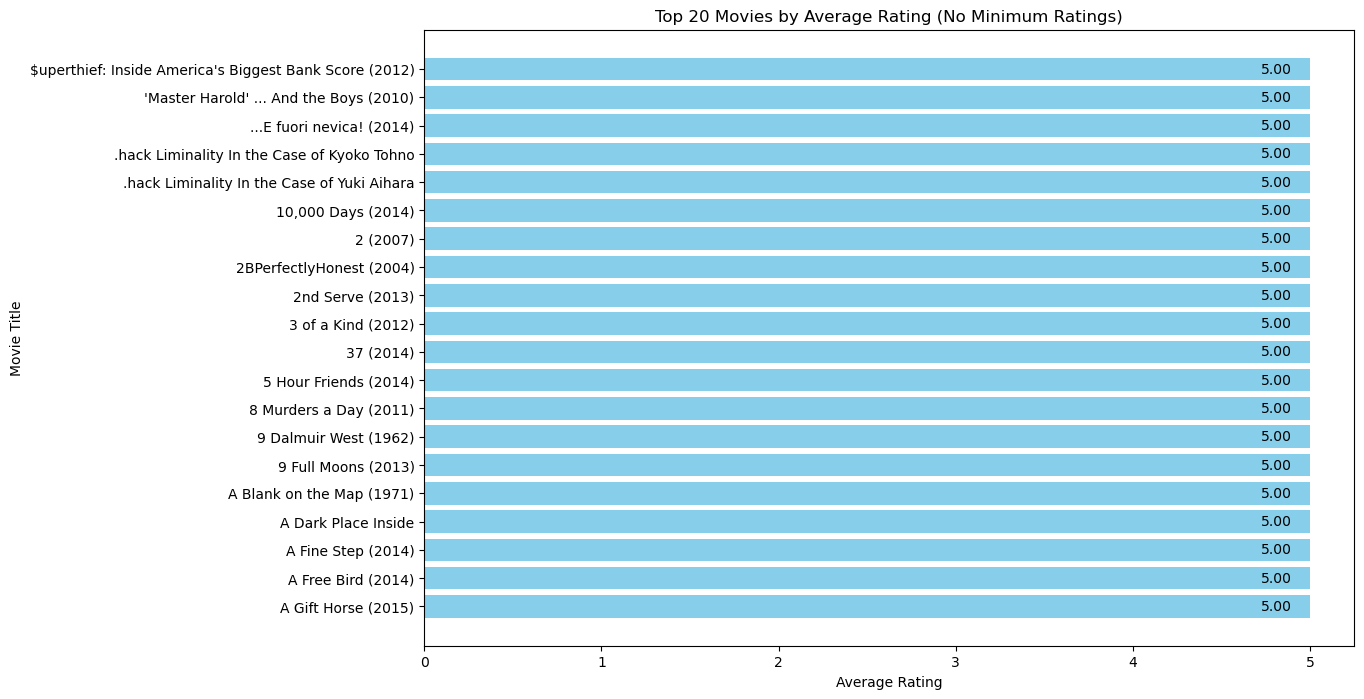

In [7]:
# Plotting the top 20 movies with their average ratings and rating counts (no filter)
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_all['title'], top_20_all['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Average Rating (No Minimum Ratings)')

# Adding the average rating score text on the bars
for bar, rating in zip(bars, top_20_all['average_rating']):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height() / 2, f'{rating:.2f}',
             va='center', ha='right', color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()

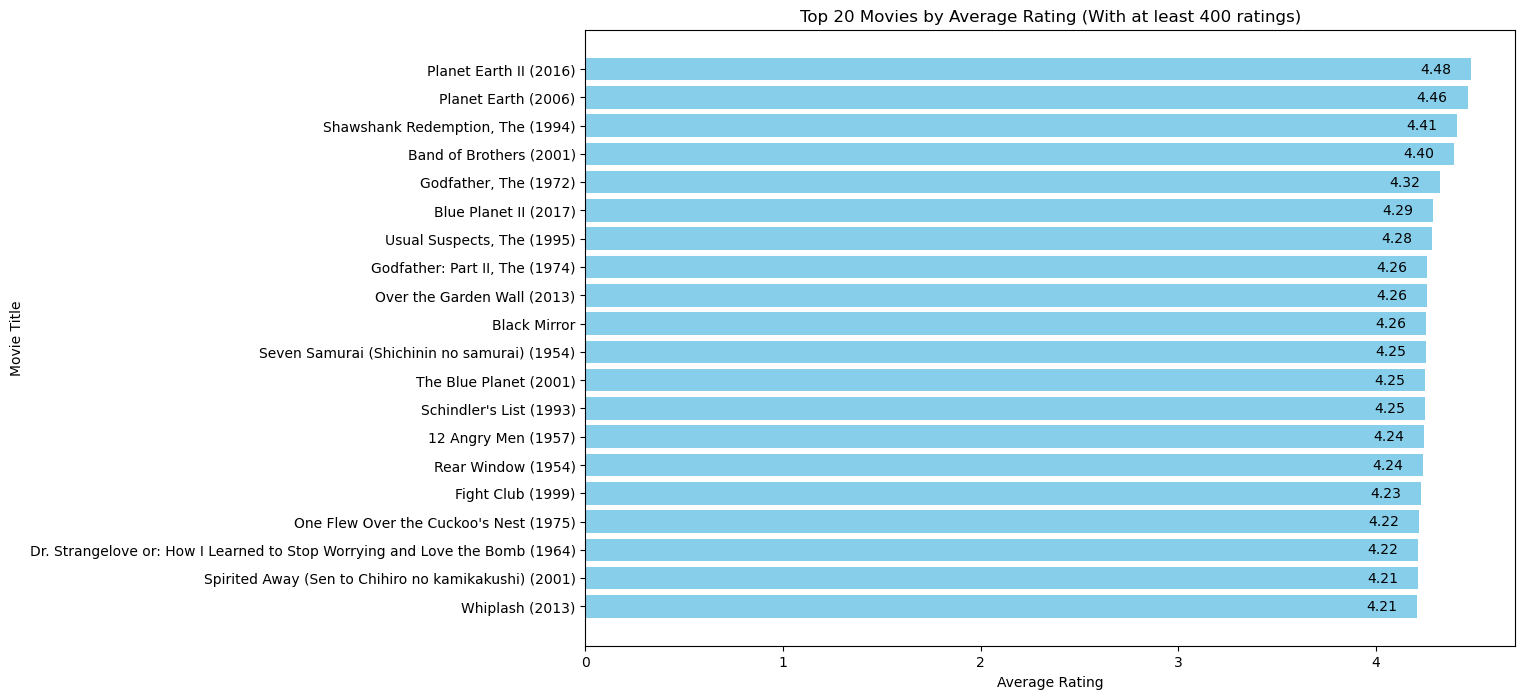

In [8]:
# Plotting the top 20 movies with their average ratings and rating counts (with at least 400 ratings)
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
bars = plt.barh(top_20_filtered['title'], top_20_filtered['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Average Rating (With at least 400 ratings)')

# Adding the average rating score text on the bars
for bar, rating in zip(bars, top_20_filtered['average_rating']):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height() / 2, f'{rating:.2f}',
             va='center', ha='right', color='black', fontsize=10)

plt.gca().invert_yaxis()
plt.show()